<center><b>Final Project</b></center>

Project Overview:

The purpose of this project is to see the relationship between life expectancy and happiness score in different countries across the world. Economic theory suggests that more developed countries have higher life expectancy, but does this matter if the people are not happy? That is why this project focuses on the relationship between the two variables and we will use linear regression analysis to test if living longer can indicate some relationship to the quality of life in one's own opinion.


Project Structure:

We will begin the project by going over how to import the data, acesss the information, and perform any premliminary data transformations to ensure that we don't run into errors. 

Next, we will provide summary statistics about life expectancy and hapiness score for different countries. Then we will graph these basic statistics for visual understanding.

After this, we will go over our assumptions for the linear regression model and what we expect to see in the predicted results. We will run the regression, analyze the output, and provide thoughts on the relationship between life expectancy and happiness, accounting for possible confounders, errors in our analysis, and what was done well. 

Data Report:

The data we use for this project comes from the online data science community platform, Kaggle. Kaggle is an open source hub where people can import datasets and projects to solve real world problems that companies or professional entities face. In our case, the Sustainable Development Solutions Network provided a report on world happiness. To access this data, click this link: https://www.kaggle.com/unsdsn/world-happiness.

Key Variables:

The 2 key variables we use in this project are life expectancy (explanatory variable) and happiness score (response variable). However, we may run into confounders and believe GDP per capita may also provide useful information as an explanatory variable, so we end up with 3 variables.

We'd also like to note that the quantitative values provided in the dataset are not completely straightforward. As the data description states, "The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others." Therefore, we will use our explanatory variables with caution and see whether or not life expectancy and happiness either have a positive, negative, or negligent relationship with each other. We will also include a model with GDP per capita and see if the beta coefficients for the explanatory variables are significant. 

Having said that, the variables are defined as:

<b>Health Life Expectancy:</b> the extent to which Life expectancy contributed to the calculation of the Happiness Score

<b>GDP Per Capita:</b> The extent to which GDP contributes to the calculation of the Happiness Score

<b>Happiness Score:</b> A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."


In [6]:
# Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [44]:
# Access Data

# note: download the file locally and change the path name accordingly to read the data
path="/Users/katman/Documents/Senior Courses/Econ 149/project1/World Happiness Data/2019.csv"

data = pd.read_csv(path, parse_dates=True)
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [45]:
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [46]:
# Summary Statistics
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


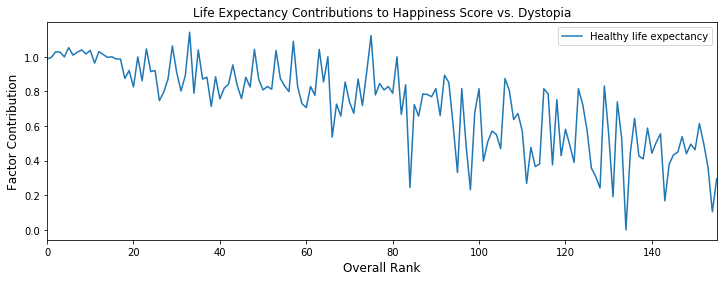

In [69]:
# Graphing the Life Expectancy contributions to Happiness Score (factored against Dystopia)
# since the dataset is already in order of overall rank and happiness score, we don't need to set an index
data1=data['Healthy life expectancy']
ax = data1.plot(title='Life Expectancy Contributions to Happiness Score vs. Dystopia', legend=True, figsize=(12,4))
ax.set_xlabel('Overall Rank', fontsize=12)
ax.set_ylabel('Factor Contribution', fontsize=12)
plt.show()

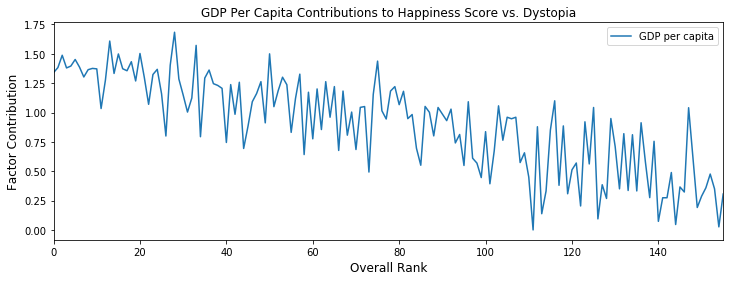

In [70]:
# Graphing the GDP per capita contributions to Happiness Score (factored against Dystopia)
# since the dataset is already in order of overall rank and happiness score, we don't need to set an index
data1=data['GDP per capita']
ax = data1.plot(title='GDP Per Capita Contributions to Happiness Score vs. Dystopia', legend=True, figsize=(12,4))
ax.set_xlabel('Overall Rank', fontsize=12)
ax.set_ylabel('Factor Contribution', fontsize=12)
plt.show()